# **DATA CHALLENGE MDI341 - ALI Mohammad Fayyaz - MS BGD 2020**


Une première difficulté de ce DataChallenge provient du côté non-supervisé. Nous ne savons pas s'il y a des Outliers dans les séries temporelles du Train (nous allons supposer qu'il n'y en a pas), et ensuite il est difficile  de dire ce qu'est une anomalie ou non dans le Test. Seule une expertise métier permettrait de faire la différence entre ce qui est vraiment Outlier, d'un comportement normal mais non vu dans le Train.  

Le Meilleur Score: 0.8327 a été obtenu par combinaison (somme cumulée) des meilleurs scoreurs provenant de plusieurs familles/espaces d'outlier (LOF, LoOP, IF, Espaces réduits par PCA)

Afin de créer des features, l'idée a été de créer des indicateurs qui pourraient être susceptibles de faire apparaître différents types de défaillances des capteurs (pas de signal, pics, instabilité ...).

Dans le cadre de la détection d'anomalie, un bon scoreur se doit de mettre un 'écart' entre les inlier et les outlier, mais l'ordre d'attribution des scores à l'intérieur des deux populations n'est pas important. La littérature propose des idées pour essayer de créer ce décalage entre inlier/outlier, notamment grâce à des techniques d'ensemble. Mais la base de départ est la disposition de bons scoreurs uniques.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Exploration

## Chargements Premières Librairies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

## Load the data

In [ ]:
xtrain = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/airbus_train.csv', delimiter= ' ')
print(xtrain.shape)
xtest = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/airbus_test.csv', delimiter= ' ')
print(xtest.shape)

(1677, 61440)
(2511, 61440)


In [ ]:
xtrain2 = np.concatenate((xtrain, xtest), axis=0)
xtrain2.shape

(4188, 61440)

## A sample plot

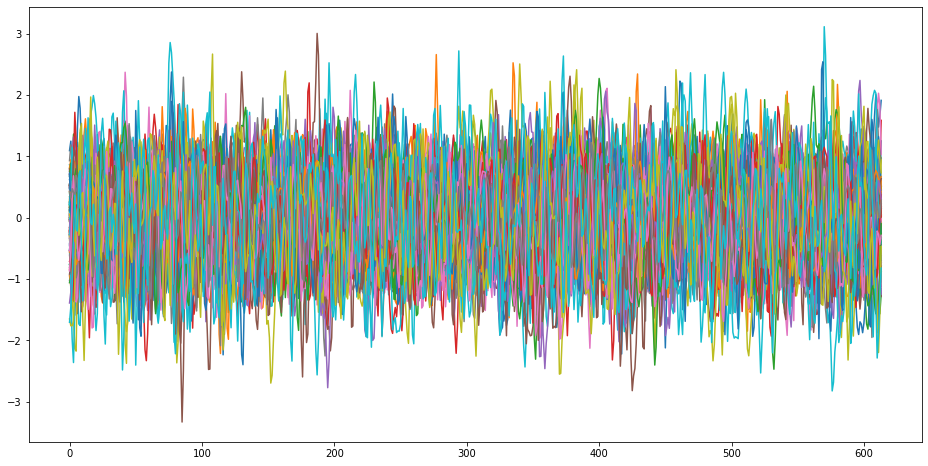

In [ ]:
# Plot first 614 time points for first 100 observations
plt.figure(figsize=(16,8))
for i in range(100):
    plt.plot(range(614),xtrain[i,:614])
plt.show()

## Possible option: Using the projection on a low-dimensional space

### Uniquement Train

In [ ]:
# PCA transform
pca1 = PCA(n_components = 10, whiten = True)
pca1.fit(xtrain[:100,:])
xtrain_fpca = pca1.fit_transform(xtrain[:100,:])
# Fit the low-dimensional method
lof1 = LocalOutlierFactor(n_neighbors = 5 ,contamination = 'auto', novelty = True)
lof1.fit(xtrain_fpca)
# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest)
sscore = -lof1.score_samples(xtest_fpca)
print(sscore[:100])

[1.92875623 1.04699025 1.1048999  1.15348768 1.05371677 1.11280254
 1.1655844  1.06967357 1.17460024 1.83258746 1.21565083 1.07308694
 1.05095754 1.04669052 1.08569341 1.12694265 1.06069627 1.0585207
 1.07141256 1.07161641 1.1217922  1.0684585  1.05564484 1.16384535
 4.39006564 1.05179831 1.05387629 1.04764358 1.10365167 1.05670654
 1.13744574 1.07104657 1.05538388 1.11220471 1.09001464 1.21340586
 1.02964435 3.31447051 1.05896752 1.23705068 1.0870835  1.07650398
 1.09431095 1.05941906 1.05459188 1.05099853 1.41475382 1.07261727
 1.32877285 1.15181073 1.0825251  0.99241947 1.0526     1.16863685
 1.74824732 1.07687748 1.05758721 1.55481834 1.06334431 1.06722454
 1.50833442 1.07559343 1.0163673  1.03096915 1.02375325 1.07226343
 1.99447686 1.0660658  1.13558278 1.0650854  3.71926264 1.06104506
 1.19350582 1.12611882 2.18015427 1.16531257 1.04351623 1.06628717
 1.0360805  1.07371189 1.03064001 1.05677057 1.65774052 1.05699173
 1.09479706 1.08251512 1.05869344 1.06837309 1.05344707 1.08024

Prepare a file for submission

In [ ]:
# Save the anomaly scores to file
print(sscore.shape)
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest1_mdi341_Fayyaz_Pavlo.csv', sscore, fmt = '%1.15f', delimiter=',')
#score: 0.707

(2511,)


### Train et Test

In [ ]:
# PCA transform
pca1 = PCA(n_components = 10, whiten = True)
pca1.fit(xtrain2)
xtrain_fpca = pca1.fit_transform(xtrain2)
# Fit the low-dimensional method
lof1 = LocalOutlierFactor(n_neighbors = 5 ,contamination = 'auto', novelty = True)
lof1.fit(xtrain_fpca)
# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest)
sscore = -lof1.score_samples(xtest_fpca)
print(sscore[:100])

[1.44109814 1.36770495 1.74253004 1.48649029 1.46969321 1.5809794
 1.71321164 1.37278268 1.60689529 1.34711961 1.25882211 1.81851815
 1.68580582 1.39514637 1.49687232 1.4293528  1.70266129 1.67144004
 1.87771613 2.17523866 1.76795852 1.69032893 1.34176296 1.96445503
 2.67980132 1.633887   1.25686206 2.1930601  1.46772826 1.39383597
 4.10420908 1.67562226 1.61721994 2.00543138 2.24995565 1.71137209
 1.58599252 1.72687436 1.53877718 2.67744607 1.71593787 1.56535623
 1.99630379 1.70550087 1.91257866 1.60834236 1.45673254 1.5557818
 1.5629361  1.72386336 1.07330364 1.14949997 1.24068319 1.60724349
 1.20602359 1.60178387 1.52529531 1.23965697 1.74537843 1.97799324
 1.87776525 1.37478073 1.65084986 2.20233091 1.54848922 2.03297007
 1.71088626 2.05272778 1.49107466 1.27811978 1.93478904 2.10913775
 1.61634463 1.55937349 2.03374581 1.44486097 1.52629814 1.61640882
 1.11013562 1.67468991 2.1000507  1.27491593 1.58288447 1.33744931
 1.31253603 1.56912722 1.55024186 1.65575027 1.59916441 1.657086

In [ ]:
 # Save the anomaly scores to file
print(sscore.shape)
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest4_mdi341_Fayyaz_Pavlo2.csv', sscore, fmt = '%1.15f', delimiter=',')
#score: 0.52

(2511,)


## Visualisations

In [ ]:
xt = np.linspace(0,60,61440)
xt

array([0.00000000e+00, 9.76578395e-04, 1.95315679e-03, ...,
       5.99980468e+01, 5.99990234e+01, 6.00000000e+01])

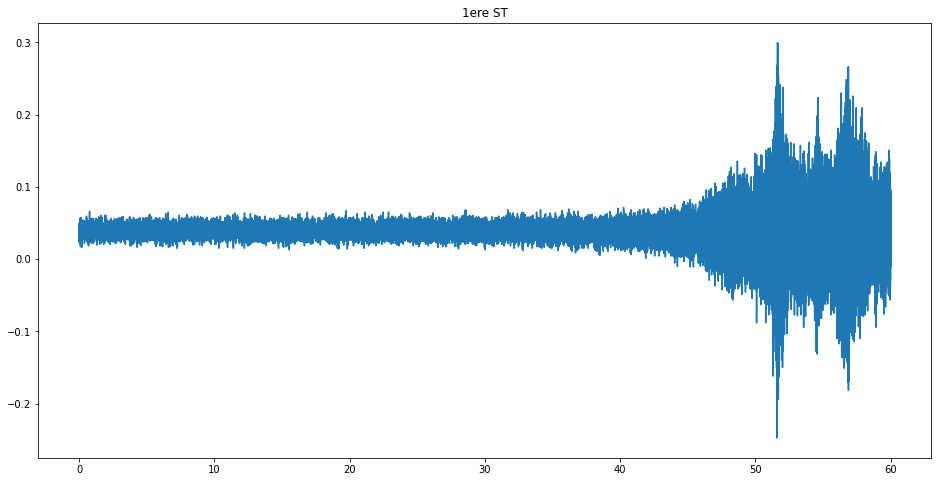

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtrain[0,:])
plt.title("1ere ST")
plt.show()

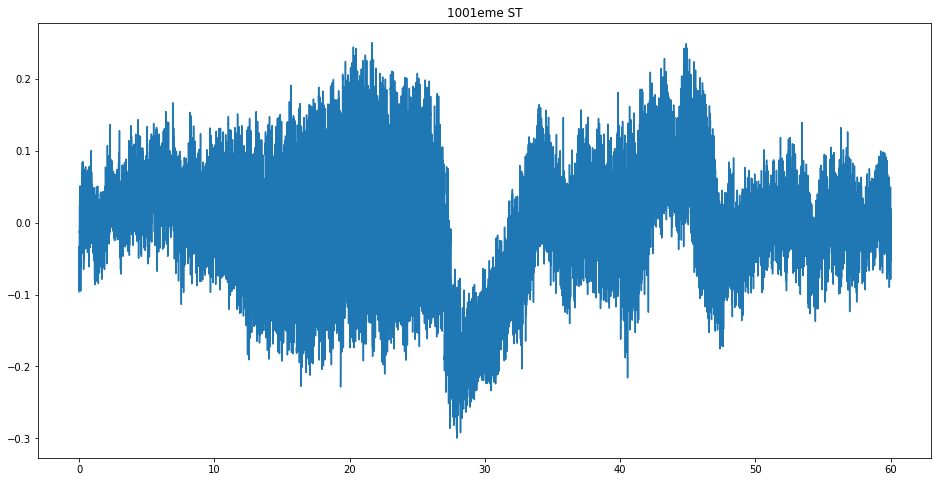

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtrain[1000,:])
plt.title("1001eme ST")
plt.show()

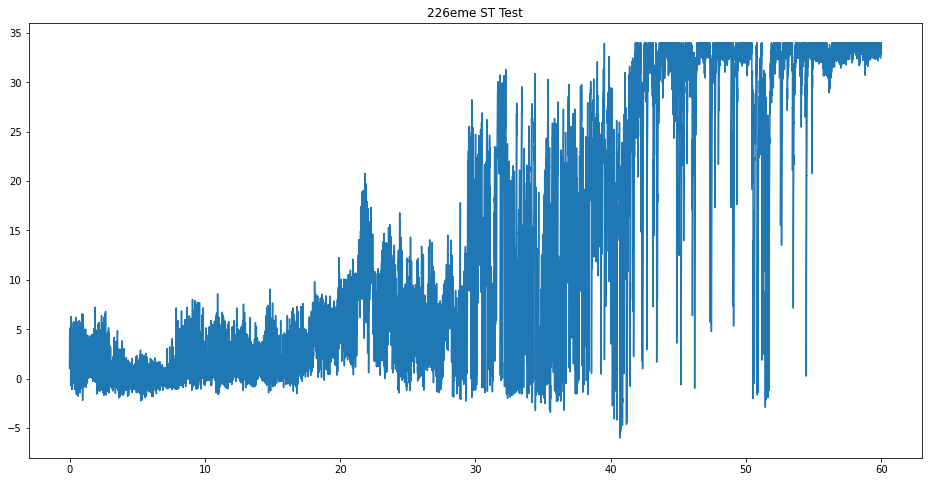

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtest[225,:])#xtrain2[1902,:]
plt.title("226eme ST Test")
plt.show()

## Transformation des ST: Normalisation Min-Max

En visualisant plusieurs séries temporelles du jeu de train et du jeu de test, nous remarquons que les valeurs renvoyés par les capteurs ont un spectre très large (de 10-2 à 40). Peut être que ces capteurs ne mesurent pas tous la même chose (situation et lieu), et que donc leurs valeurs de fonctionnement ne peut pas être un indicateur de défaillance.  
Une normalisation min-max est proposée, elle ne donnera finalement pas les meilleurs résultats.

In [ ]:
xtrain_trans = np.zeros(xtrain.shape)
xtest_trans = np.zeros(xtest.shape)

In [ ]:
for row in range(xtrain.shape[0]):
  val_min = np.min(xtrain[row,:])
  val_max = np.max(xtrain[row,:])
  if (val_max-val_min) == 0:
     xtrain_trans[row,:] = xtrain[row,:] #- val_min
  else:
    xtrain_trans[row,:] =  (xtrain[row,:] - val_min)/(val_max - val_min)
    #xtrain_trans[row,:] = np.tanh(xtrain[row,:])

In [ ]:
for row in range(xtest.shape[0]):
  val_min = np.min(xtest[row,:])
  val_max = np.max(xtest[row,:])
  if (val_max-val_min) == 0:
     xtest_trans[row,:] = xtest[row,:] #- val_min
  else:
    xtest_trans[row,:] =  (xtest[row,:] - val_min)/(val_max - val_min)
    #xtest_trans[row,:] = np.tanh(xtest[row,:])

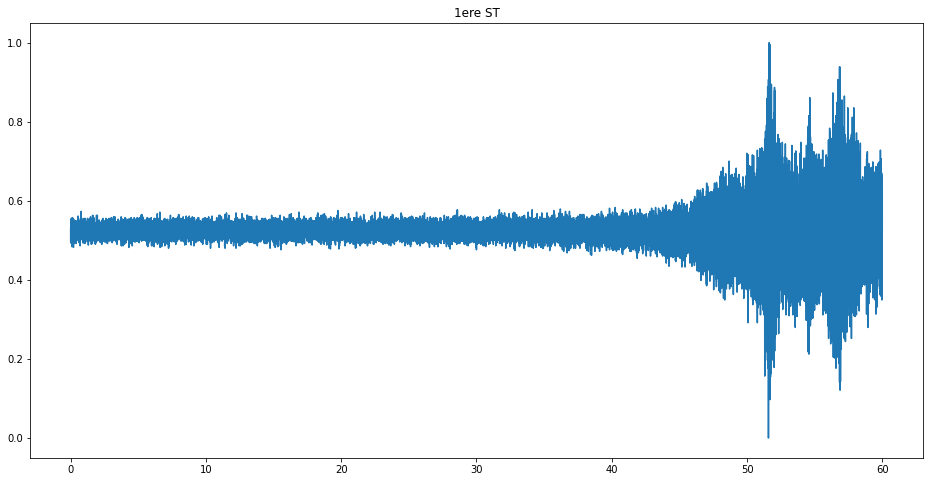

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtrain_trans[0,:])
plt.title("1ere ST")
plt.show()

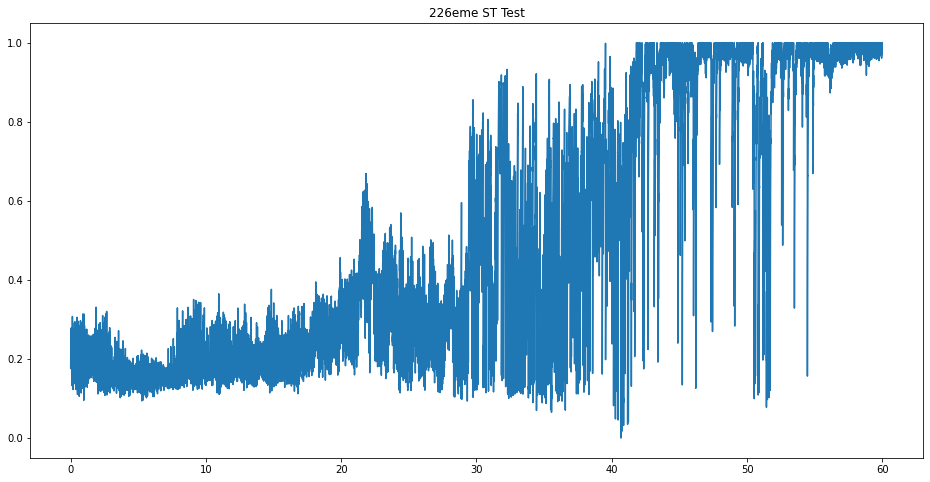

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtest_trans[225,:])
plt.title("226eme ST Test")
plt.show()

In [ ]:
############ Valeurs Absolues des Capteurs non importantes?
#xtrain_init = xtrain
#xtest_init = xtest
#xtrain = xtrain_trans
#xtest = xtest_trans
############

# Dataset

## Création de Features

### Statistiques

Statistiques de chaque série temporelles, notamment les valeurs robustes aux outliers, telles que la médiane, ou le MAD.  
Puis calcul de statistiques de chaque seconde d'enregistrement de chaque série temporelle, pour essayer de capter des irrégularités temporelles.

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import median_absolute_deviation as MAD

**Stats Globales**

Train:

In [ ]:
liste_moy_train = []
liste_std_train = []
liste_mad_train = []
liste_mdn_train = []
liste_kur_train = []
liste_skw_train = []
liste_min_train = []
liste_max_train = []

for row in range(xtrain.shape[0]):
  liste_moy_train.append(xtrain[row,:].mean())
  liste_std_train.append(xtrain[row,:].std())
  liste_mad_train.append(MAD(xtrain[row,:]))
  liste_mdn_train.append(np.median(xtrain[row,:]))
  liste_kur_train.append(kurtosis(xtrain[row,:]))
  liste_skw_train.append(skew(xtrain[row,:]))
  liste_min_train.append(np.min(xtrain[row,:]))
  liste_max_train.append(np.max(xtrain[row,:]))

In [ ]:
moy_train = np.array(liste_moy_train).reshape(-1,1)
std_train = np.array(liste_std_train).reshape(-1,1)
mad_train = np.array(liste_mad_train).reshape(-1,1)
mdn_train = np.array(liste_mdn_train).reshape(-1,1)
kur_train = np.array(liste_kur_train).reshape(-1,1)
skw_train = np.array(liste_skw_train).reshape(-1,1)
min_train = np.array(liste_min_train).reshape(-1,1)
max_train = np.array(liste_max_train).reshape(-1,1)

Test:

In [ ]:
liste_moy_test = []
liste_std_test = []
liste_mad_test = []
liste_mdn_test = []
liste_kur_test = []
liste_skw_test = []
liste_min_test = []
liste_max_test = []

for row in range(xtest.shape[0]):
  liste_moy_test.append(xtest[row,:].mean())
  liste_std_test.append(xtest[row,:].std())
  liste_mad_test.append(MAD(xtest[row,:]))
  liste_mdn_test.append(np.median(xtest[row,:]))
  liste_kur_test.append(kurtosis(xtest[row,:]))
  liste_skw_test.append(skew(xtest[row,:]))
  liste_min_test.append(np.min(xtest[row,:]))
  liste_max_test.append(np.max(xtest[row,:]))

In [ ]:
moy_test = np.array(liste_moy_test).reshape(-1,1)
std_test = np.array(liste_std_test).reshape(-1,1)
mad_test = np.array(liste_mad_test).reshape(-1,1)
mdn_test = np.array(liste_mdn_test).reshape(-1,1)
kur_test = np.array(liste_kur_test).reshape(-1,1)
skw_test = np.array(liste_skw_test).reshape(-1,1)
min_test = np.array(liste_min_test).reshape(-1,1)
max_test = np.array(liste_max_test).reshape(-1,1)

**Découpage temporelle de la série toutes les secondes**

Train:

In [ ]:
liste_moy_train_sec = np.zeros([xtrain.shape[0],60])
liste_std_train_sec = np.zeros([xtrain.shape[0],60])
liste_mad_train_sec = np.zeros([xtrain.shape[0],60])
liste_kur_train_sec = np.zeros([xtrain.shape[0],60])
liste_skw_train_sec = np.zeros([xtrain.shape[0],60])
liste_min_train_sec = np.zeros([xtrain.shape[0],60])
liste_max_train_sec = np.zeros([xtrain.shape[0],60])

In [ ]:
for row in range(xtrain.shape[0]):
  ind = 0
  for i in range(1024,61440,1024):
    liste_moy_train_sec[row,ind] = np.mean(xtrain[row,i-1024:i])
    liste_std_train_sec[row,ind] = np.std(xtrain[row,i-1024:i])
    liste_mad_train_sec[row,ind] = MAD(xtrain[row,i-1024:i])
    liste_kur_train_sec[row,ind] = kurtosis(xtrain[row,i-1024:i])
    liste_skw_train_sec[row,ind] = skew(xtrain[row,i-1024:i])
    liste_min_train_sec[row,ind] = np.min(xtrain[row,i-1024:i])
    liste_max_train_sec[row,ind] = np.max(xtrain[row,i-1024:i])
    #print(xt[i-1024])
    #print(xt[i])
    ind = ind+1

In [ ]:
moy_train_sec = np.std(liste_moy_train_sec,axis=1) 
std_train_sec = np.std(liste_std_train_sec,axis=1)
mad_train_sec = np.std(liste_mad_train_sec,axis=1)
kur_train_sec = np.std(liste_kur_train_sec,axis=1)
skw_train_sec = np.std(liste_skw_train_sec,axis=1)
min_train_sec = np.std(liste_min_train_sec,axis=1)
max_train_sec = np.std(liste_max_train_sec,axis=1)

Test:

In [ ]:
liste_moy_test_sec = np.zeros([xtest.shape[0],60])
liste_std_test_sec = np.zeros([xtest.shape[0],60])
liste_mad_test_sec = np.zeros([xtest.shape[0],60])
liste_kur_test_sec = np.zeros([xtest.shape[0],60])
liste_skw_test_sec = np.zeros([xtest.shape[0],60])
liste_min_test_sec = np.zeros([xtest.shape[0],60])
liste_max_test_sec = np.zeros([xtest.shape[0],60])

In [ ]:
for row in range(xtest.shape[0]):
  ind = 0
  for i in range(1024,61440,1024):
    liste_moy_test_sec[row,ind] = np.mean(xtest[row,i-1024:i])
    liste_std_test_sec[row,ind] = np.std(xtest[row,i-1024:i])
    liste_mad_test_sec[row,ind] = MAD(xtest[row,i-1024:i])
    liste_kur_test_sec[row,ind] = kurtosis(xtest[row,i-1024:i])
    liste_skw_test_sec[row,ind] = skew(xtest[row,i-1024:i])
    liste_min_test_sec[row,ind] = np.min(xtest[row,i-1024:i])
    liste_max_test_sec[row,ind] = np.max(xtest[row,i-1024:i])
    #print(xt[i-1024])
    #print(xt[i])
    ind = ind+1

In [ ]:
moy_test_sec = np.std(liste_moy_test_sec,axis=1) 
std_test_sec = np.std(liste_std_test_sec,axis=1)
mad_test_sec = np.std(liste_mad_test_sec,axis=1)
kur_test_sec = np.std(liste_kur_test_sec,axis=1)
skw_test_sec = np.std(liste_skw_test_sec,axis=1)
min_test_sec = np.std(liste_min_test_sec,axis=1)
max_test_sec = np.std(liste_max_test_sec,axis=1)

### Régression Linéaire (Tendance Temporelle)


Une régression linéaire sur le temps avec un coefficient non nul par rapport au temps pourrait traduire une dérive du capteur

In [ ]:
from sklearn.linear_model import LinearRegression

Train:

In [ ]:
array_reglin = np.zeros([xtrain.shape[0],2])

In [ ]:
for row in range(xtrain.shape[0]):
  reg = LinearRegression().fit(xt.reshape(-1,1), xtrain[row,:])
  array_reglin[row,0] = reg.coef_
  array_reglin[row,1] = reg.intercept_
array_reglin.shape

(1677, 2)

Test:

In [ ]:
array_reglin_test = np.zeros([xtest.shape[0],2])

In [ ]:
for row in range(xtest.shape[0]):
  reg = LinearRegression().fit(xt.reshape(-1,1), xtest[row,:])
  array_reglin_test[row,0] = reg.coef_
  array_reglin_test[row,1] = reg.intercept_
array_reglin_test.shape

(2511, 2)

### Modèle AR

Une modèle AR pourrait peut être permettre de détecter certains défauts de capteurs, tels que des effets d'inertie, qui engendraient des mesures parasites.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.api as smt

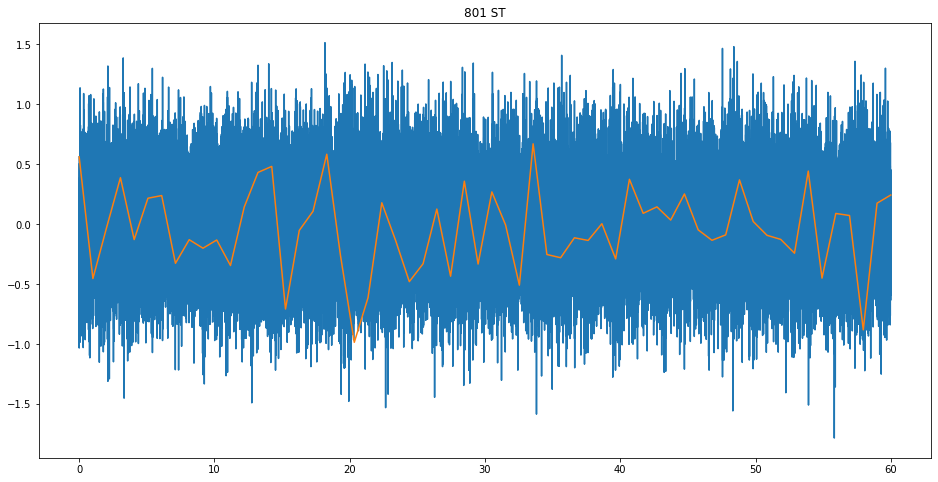

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtrain[800,:])
plt.plot(np.linspace(0,60,60),xtrain[800,::1024])

plt.title("801 ST")
plt.show()

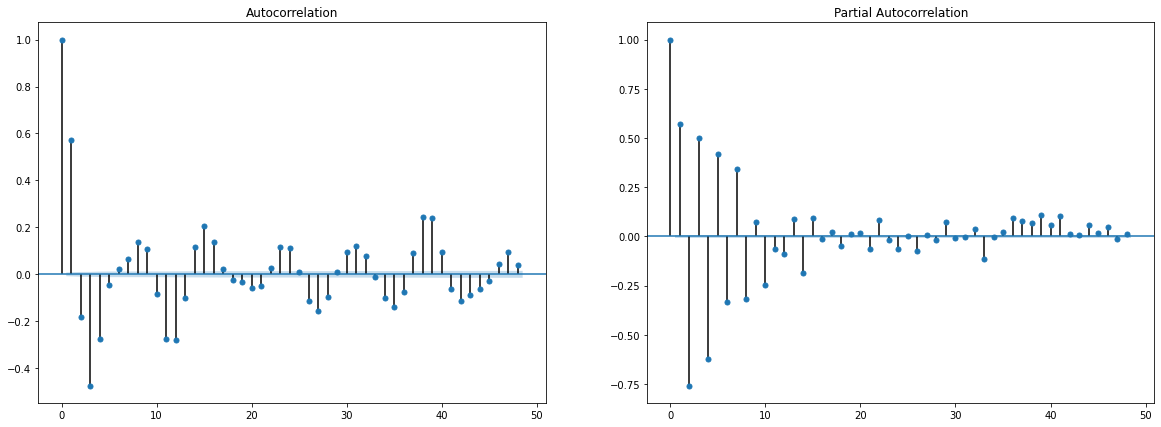

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

fig = plot_acf(np.asarray(xtrain[800,:]), ax=axes[0]) 
fig = plot_pacf(np.asarray(xtrain[800,:]), ax=axes[1])

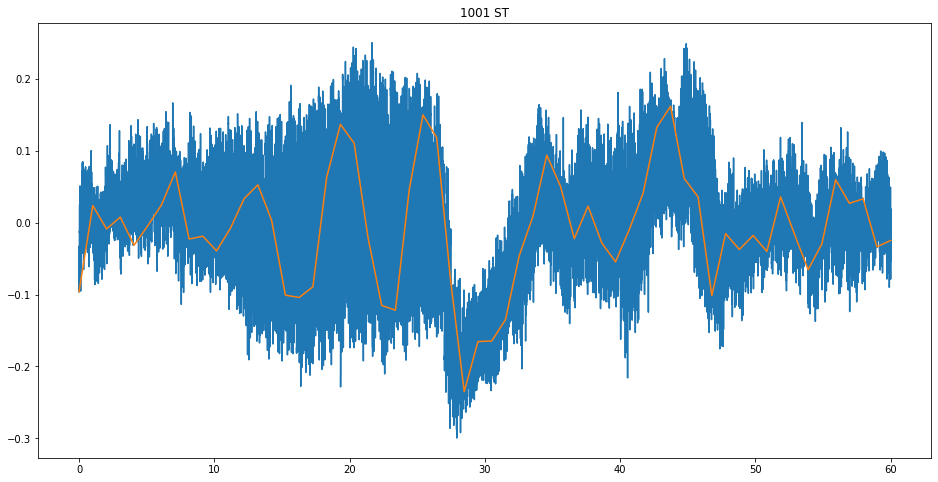

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtrain[1000,:])
plt.plot(np.linspace(0,60,60),xtrain[1000,::1024])

plt.title("1001 ST")
plt.show()

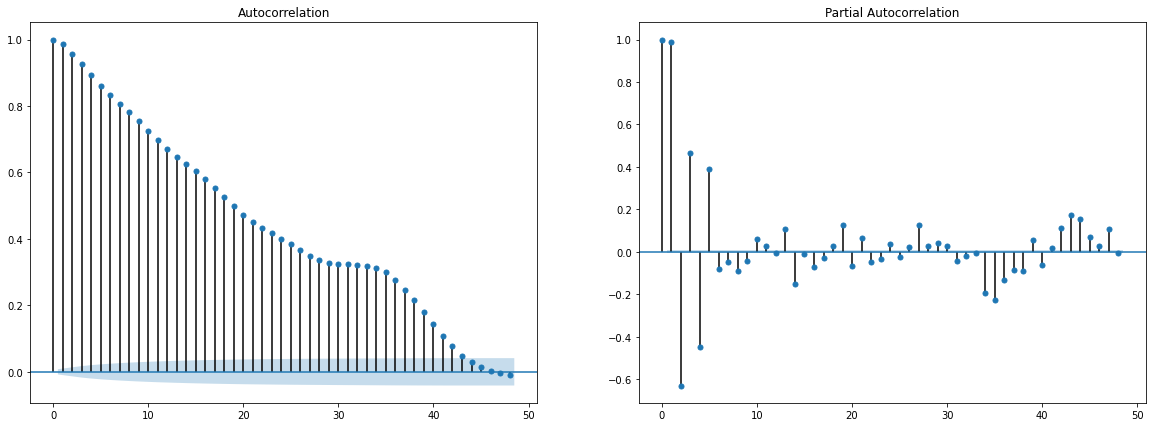

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

fig = plot_acf(np.asarray(xtrain[1000,:]), ax=axes[0]) 
fig = plot_pacf(np.asarray(xtrain[1000,:]), ax=axes[1])

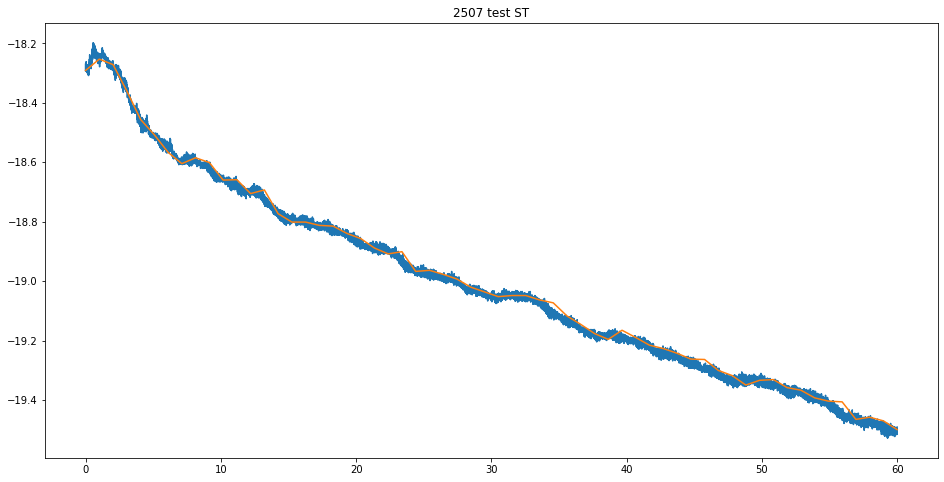

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtest[2506,:])
plt.plot(np.linspace(0,60,60),xtest[2506,::1024])

plt.title("2507 test ST")
plt.show()

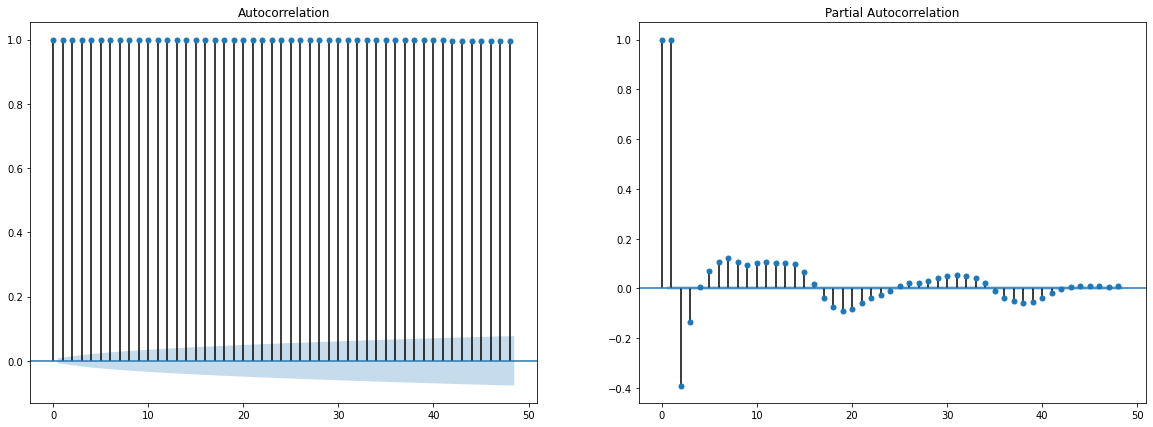

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

fig = plot_acf(np.asarray(xtest[2506,:]), ax=axes[0]) 
fig = plot_pacf(np.asarray(xtest[2506,:]), ax=axes[1])

In [ ]:
model = ARIMA(xtrain[800,:], order=(10,0,0))
model_fit = model.fit()
model_fit.params

array([-0.00553692,  2.38517217, -4.03510015,  5.019661  , -5.30738381,
        4.75568231, -3.81797418,  2.64378782, -1.56751048,  0.71457233,
       -0.26489359])

In [ ]:
mdl = smt.AR(xtrain[800,:]).fit(maxlag=50,trend='nc')
mdl.params

array([ 2.41410603e+00, -4.21084722e+00,  5.41338194e+00, -6.03925909e+00,
        5.87452688e+00, -5.39366611e+00,  4.65045494e+00, -3.97518175e+00,
        3.37247821e+00, -3.02695716e+00,  2.62594311e+00, -2.29620485e+00,
        1.78066693e+00, -1.30571189e+00,  8.86414573e-01, -6.17786699e-01,
        4.19163436e-01, -2.97467403e-01,  2.99540004e-01, -4.30574390e-01,
        6.07282093e-01, -7.32203313e-01,  7.09427390e-01, -5.59140983e-01,
        3.31192396e-01, -6.17776695e-02, -2.15495947e-01,  4.98421026e-01,
       -6.72728380e-01,  7.56664031e-01, -6.25024264e-01,  4.43709475e-01,
       -2.09095343e-01,  6.16887326e-02,  5.66001802e-02, -6.01394047e-02,
        6.91656485e-02,  1.25158395e-01, -2.67816489e-01,  5.21516425e-01,
       -6.24251146e-01,  7.15013086e-01, -6.29194430e-01,  5.20503546e-01,
       -3.58969142e-01,  2.22446106e-01, -8.34487296e-02,  7.65132893e-04,
        2.55335022e-02, -2.59059221e-02])

In [ ]:
%%time
liste_constant = []
for row in range(xtest.shape[0]):
  #print(row)
  try:
    mdl = smt.AR(xtest[row,:]).fit(maxlag=10)
  except:
    liste_constant.append(row)

CPU times: user 5min 40s, sys: 7min 27s, total: 13min 8s
Wall time: 3min 18s


In [ ]:
liste_constant

[1938,
 1945,
 1960,
 1971,
 1996,
 2002,
 2040,
 2107,
 2109,
 2124,
 2156,
 2160,
 2175,
 2196,
 2201,
 2266,
 2292,
 2297,
 2313,
 2320,
 2368,
 2372,
 2379,
 2444,
 2464,
 2470,
 2507]

In [ ]:
len(liste_constant)/xtest.shape[0]*100
## 1% de la base Test correspond à des signaux constants (Défaillance capteurs?)

1.0752688172043012

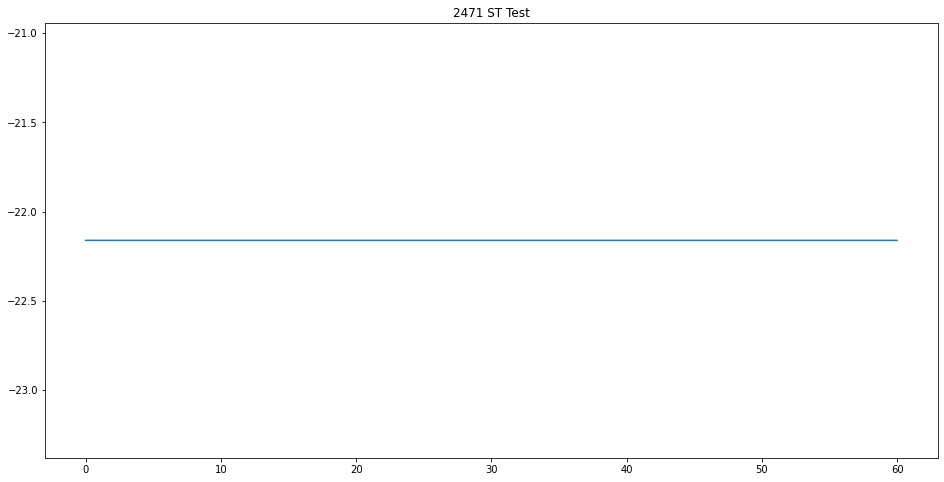

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xt,xtest[2201,:])

plt.title("2471 ST Test")
plt.show()

In [ ]:
%%time
liste_constant_train = []
for row in range(xtrain.shape[0]):
  #print(row)
  try:
    mdl = smt.AR(xtrain[row,:]).fit(maxlag=10)
  except:
    liste_constant_train.append(row)

CPU times: user 3min 47s, sys: 4min 59s, total: 8min 47s
Wall time: 2min 12s


In [ ]:
liste_constant_train
# Aucune ST constante dans le train

[]

**Création des features ARIMA**

In [ ]:
array_arima = np.zeros([xtrain.shape[0],10])

In [ ]:
%%time
for row in range(xtrain.shape[0]):
  mdl = smt.AR(xtrain[row,:]).fit(maxlag=10,trend='nc')
  array_arima[row,:] = mdl.params

CPU times: user 4min 12s, sys: 5min 44s, total: 9min 57s
Wall time: 2min 32s


In [ ]:
array_arima

array([[ 2.19082318, -3.4098405 ,  4.02160137, ..., -0.45018697,
         0.11764396,  0.04120765],
       [ 1.83270063, -2.3022195 ,  2.32959574, ..., -1.58014448,
         1.11642957, -0.58009372],
       [ 1.69161616, -1.88049337,  1.81338352, ..., -1.11685277,
         0.66829238, -0.32588944],
       ...,
       [ 2.44730802, -3.55702818,  3.89581603, ..., -0.59760782,
         0.28237972, -0.16326   ],
       [ 2.15602387, -3.91586691,  4.9144715 , ..., -1.14277913,
         0.39500331, -0.12794873],
       [ 1.59209801, -2.28000063,  2.33636376, ...,  0.59768687,
        -0.29149561,  0.23262555]])

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_arima_train_2.csv', array_arima, fmt = '%1.15f', delimiter=',')

In [ ]:
%%time
array_arima_test = np.zeros([xtest.shape[0],10])
for row in range(xtest.shape[0]):
  mdl = smt.AR(xtest[row,:]).fit(maxlag=10,trend='nc')
  array_arima_test[row,:] = mdl.params

CPU times: user 6min 18s, sys: 8min 32s, total: 14min 51s
Wall time: 3min 44s


In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_arima_test_2.csv', array_arima_test, fmt = '%1.15f', delimiter=',')

### FFT


Fréquences 'globales' à l'intérieur de l'enregistrement.

In [ ]:
freq = np.fft.fftfreq(xt.shape[-1])

Text(0.5, 1.0, 'Imag')

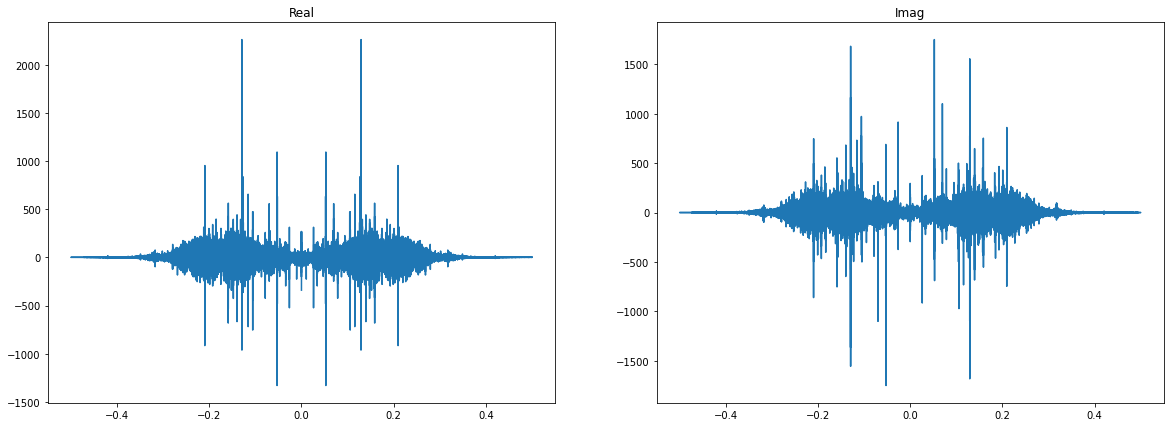

In [ ]:
## Fast Fourier Transform
fig, axes = plt.subplots(1, 2, figsize=(20,7))

axes[0].plot(freq,np.fft.fft(xtrain[800,:]).real)
axes[0].set_title('Real')
axes[1].plot(freq,np.fft.fft(xtrain[800,:]).imag)
axes[1].set_title('Imag')

https://pythontic.com/visualization/signals/fouriertransform_fft

In [ ]:
# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = len(xtrain[0,:])/60
# At what intervals time points are sampled
samplingInterval = 1 / samplingFrequency;
# Begin time period of the signals
beginTime = 0;
# End time period of the signals
endTime = 60; 
time = np.arange(beginTime, endTime, samplingInterval);

In [ ]:
amplitude = xtest[2506,:]

In [ ]:
# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

In [ ]:
tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

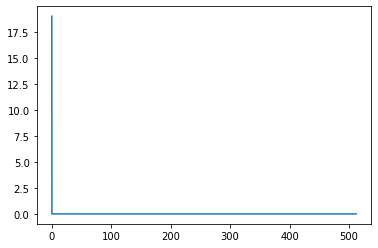

In [ ]:
plt.plot(frequencies, abs(fourierTransform))

In [ ]:
len(fourierTransform)

30720

**Création FFT Array: FFT + PCA**

Train:

In [ ]:
array_fft_full = np.zeros([xtrain.shape[0],30720])
for row in range(xtrain.shape[0]):
  amplitude = xtrain[row,:]
  fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
  fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency
  array_fft_full[row,:] = abs(fourierTransform)

In [ ]:
# PCA transform
pca_fft = PCA(n_components = 30, whiten = True)
pca_fft.fit(array_fft_full)
fft_fpca = pca_fft.fit_transform(array_fft_full)

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_fft_PCA_2.csv', fft_fpca, fmt = '%1.15f', delimiter=' ')

Test:

In [ ]:
array_fft_full_test = np.zeros([xtest.shape[0],30720])
for row in range(xtest.shape[0]):
  amplitude = xtest[row,:]
  fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
  fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency
  array_fft_full_test[row,:] = abs(fourierTransform)

In [ ]:
# PCA transform
fft_fpca_test = pca_fft.fit_transform(array_fft_full_test)

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_fft_PCA_test_2.csv',fft_fpca_test, fmt = '%1.15f', delimiter=' ')

### Rainflow

L'algorithme Rainflow permet d'énumérer le nombre de 'cycles' (Moyenne, Intensité) à l'intérieur de la Série Temporelle, mais ne respecte pas la temporalité. Peut être capable de repérer des anomalies non ponctuelles

In [ ]:
!pip install rainflow==2.2.0

  Created wheel for rainflow: filename=rainflow-2.2.0-cp36-none-any.whl size=5106 sha256=0a58625093e166c45d150e09d94bb1e14d28c4436877d3a4f7f843df08d4c83b
  Stored in directory: /root/.cache/pip/wheels/68/d3/d4/a5b78e7fe33bcf714d295e6cd654a7fe509b8845491c647ef6
Successfully built rainflow


In [ ]:
import rainflow

In [ ]:
rainflow.count_cycles(xtrain[800::1024])

[]

In [ ]:
# On définit une amplitude de cycle entre 0 et 4
def hist_rainflow(y):
  l_mean = []
  l_rng = []
  l_mult = []
  for low, high, mult  in rainflow.extract_cycles(y):
    l_mean.append(0.5 * (high + low))
    l_rng.append(high - low)
    l_mult.append(mult)

  return np.histogram(l_rng, bins=np.linspace(0,30,31), weights=l_mult)[0]

In [ ]:
hist_rainflow(xtest[200,:])

array([8028.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.])

In [ ]:
array_rainflow = np.zeros([xtrain.shape[0],30])
for row in range(xtrain.shape[0]):
  array_rainflow[row,:] = hist_rainflow(xtrain[row,:])

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_rainflow_2.csv', array_rainflow, fmt = '%1.15f', delimiter=' ')

In [ ]:
array_rainflow_test = np.zeros([xtest.shape[0],30])
for row in range(xtest.shape[0]):
  array_rainflow_test[row,:] = hist_rainflow(xtest[row,:])

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_rainflow_test_2.csv', array_rainflow_test, fmt = '%1.15f', delimiter=' ')

In [ ]:
# On définit une moyenne de cycle entre 0 et 10
def hist_mean_rainflow(y):
  l_mean = []
  l_rng = []
  l_mult = []
  for low, high, mult in rainflow.extract_cycles(y):
    l_mean.append(0.5 * (high + low))
    #l_rng.append(high - low)
    l_mult.append(mult)

  return np.histogram(l_mean, bins=np.linspace(0,10,31), weights=l_mult)[0]

In [ ]:
hist_mean_rainflow(xtest[225,:])

array([251. , 254. , 263. , 268. , 261.5, 268. , 263.5, 223.5, 155.5,
       138.5, 105. , 119. , 102. ,  88. ,  62. ,  63. ,  53. ,  66. ,
        51. ,  62. ,  40. ,  42. ,  42. ,  38. ,  22. ,  40. ,  22. ,
        22. ,  28. ,  24. ])

In [ ]:
array_mean_rainflow = np.zeros([xtrain.shape[0],30])
for row in range(xtrain.shape[0]):
  array_mean_rainflow[row,:] = hist_mean_rainflow(xtrain[row,:])

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_mean_rainflow_2.csv', array_mean_rainflow, fmt = '%1.15f', delimiter=' ')

In [ ]:
array_mean_rainflow_test = np.zeros([xtest.shape[0],30])
for row in range(xtest.shape[0]):
  array_mean_rainflow_test[row,:] = hist_mean_rainflow(xtest[row,:])

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_mean_rainflow_test_2.csv', array_mean_rainflow_test, fmt = '%1.15f', delimiter=' ')

### Ondelettes

La transformation en ondelette permet de repérer les irrégularités ponctuelles. Ce qui permet de considérer une caractérisation non linéaire de chaque Série Temporelle.  
Un CNN pourrait éventuellement apprendre les filtres, que nous devons sélectionner via les ondelettes ici.

http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

https://github.com/EstebanHess/WaveletTransform_with_pywt/blob/master/Extract_High_Freqs.ipynb

In [ ]:
!pip install scaleogram

In [ ]:
import pywt
import scaleogram as scg
import pylab

In [ ]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [ ]:
 pywt.wavelist('morl')

['morl']

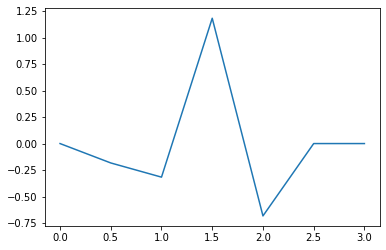

In [ ]:
[phi, psi, x] = pywt.Wavelet('sym2').wavefun(level=1)
pylab.plot(x, psi)
pylab.show()

In [ ]:
mode = pywt.Modes.smooth

def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(10):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure(figsize=(20,10))
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))

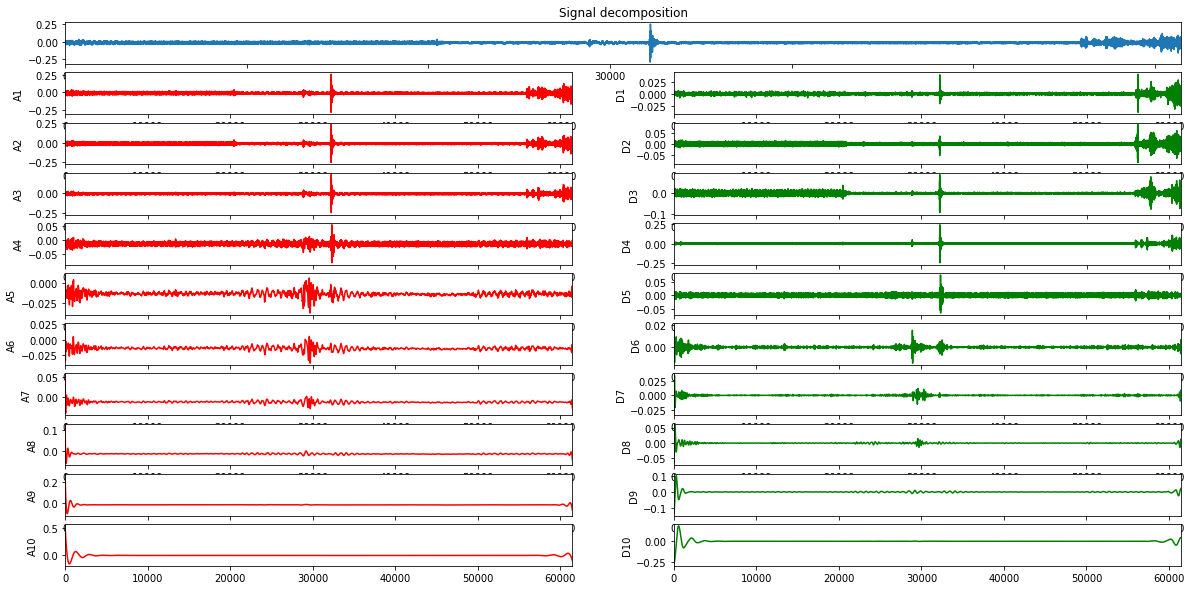

In [ ]:
ts_test = xtest[564,:]#564
plot_signal_decomp(ts_test, 'sym14', "Signal decomposition")

In [ ]:
def dwt_steps(a, w, mode, num_steps):
    ca = []
    cd = []
    for i in range(num_steps + 1):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)
    return ca, cd

In [ ]:
w = 'sym14'
mode = pywt.Modes.smooth
ca, cd = dwt_steps(ts_test, w, mode, 10)

In [ ]:
rec_a = []
rec_d = []

for i, coeff in enumerate(ca):
    coeff_list = [coeff, None] + [None] * i
    rec_a.append(pywt.waverec(coeff_list, w))

for i, coeff in enumerate(cd):
    coeff_list = [None, coeff] + [None] * i
    rec_d.append(pywt.waverec(coeff_list, w))

In [ ]:
len(ca[8])

146

In [ ]:
array_wavelet = np.zeros([xtrain.shape[0],146])
for row in range(xtrain.shape[0]):
  ca, cd = dwt_steps(xtrain[row,:], w, mode, 10)
  array_wavelet[row,:] = cd[8]

In [ ]:
# PCA transform
pca_wavelet = PCA(n_components = 30, whiten = True)
pca_fft.fit(array_wavelet)
wavelet_pca = pca_fft.fit_transform(array_wavelet)

In [ ]:
array_wavelet_test = np.zeros([xtest.shape[0],146])
for row in range(xtest.shape[0]):
  ca, cd = dwt_steps(xtest[row,:], w, mode, 10)
  array_wavelet_test[row,:] = ca[8]

In [ ]:
wavelet_pca_test = pca_fft.fit_transform(array_wavelet_test)

### B-spline (pas fait)

Spline: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html

Find Peaks: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

## Création Matrices

Récupération des features calculés précédemment, et concaténations dans des Matrices de Design.  
Chaque algorithme pourra évoluer sur son espace propre, ce qui permettra d'introduire de la diversité dans la détection d'anomalie.   
La littérature propose des façons de faire de la détection d'anomalie par Ensemble non supervisé, la diversité des décisions y est primordiale.

### Chargement

**Stats**

In [ ]:
X_stats_train = np.c_[mad_train_sec, kur_train_sec, skw_train_sec, min_train_sec, max_train_sec]
X_stats_test = np.c_[mad_test_sec, kur_test_sec, skw_test_sec, min_test_sec, max_test_sec]

**Regression Linéaire**

In [ ]:
X_regl_train = array_reglin
X_regl_test = array_reglin_test

**ARIMA**

In [ ]:
array_arima = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_arima_train.csv', delimiter= ',')
array_arima_test = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_arima_test.csv', delimiter= ',')

In [ ]:
X_arima_train = array_arima
X_arima_test = array_arima_test

**Rainflow**

In [ ]:
array_rainflow = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_rainflow_2.csv', delimiter=' ')
array_rainflow_test = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_rainflow_test_2.csv', delimiter=' ')

In [ ]:
array_mean_rainflow = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_mean_rainflow_2.csv', delimiter=' ')
array_mean_rainflow_test = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_mean_rainflow_test_2.csv', delimiter=' ')

In [ ]:
X_rainflow_train = np.c_[array_rainflow,array_mean_rainflow]
X_rainflow_test = np.c_[array_rainflow_test,array_mean_rainflow_test]

**FFT**

In [ ]:
array_fft = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_fft_PCA_2.csv', delimiter=' ')
array_fft_test = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MDI341/array_fft_PCA_test_2.csv', delimiter=' ')

In [ ]:
X_fft_train = array_fft
X_fft_test = array_fft_test

**Ondelettes**

In [ ]:
X_wave_train = wavelet_pca
X_wave_test = wavelet_pca_test

### Concaténation

**All**

In [ ]:
X_all_train = np.c_[X_stats_train,X_regl_train,X_arima_train,X_rainflow_train,X_fft_train,X_wave_train]
X_all_test = np.c_[X_stats_test,X_regl_test,X_arima_test,X_rainflow_test,X_fft_test,X_wave_test]

# Apprentissage

## One Dimension

L'idée est de fitter la meilleure loi statistique sur une statistique robuste du jeu de train, et faire que le score soit la distribution de cette loi.   
Les scores ne sont pas bons avec cette méthode, il faut prendre en compte plus de dimensions.

In [ ]:
import scipy.stats as st
from scipy.stats import t
from scipy.stats import fatiguelife
from scipy.stats import johnsonsu
from scipy.stats import alpha

(array([ 1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,
         0.,  1.,  2.,  3.,  1.,  5.,  4.,  4.,  4.,  3.,  6.,  2.,  8.,
         6.,  3.,  6.,  4., 10., 11., 14., 18., 26., 25., 13., 31., 27.,
        31., 33., 50., 47., 51., 55., 66., 71., 62., 73., 72., 74., 58.,
        73., 70., 51., 73., 43., 47., 64., 29., 38., 28., 32., 27.,  6.,
        13.,  9., 14., 15.,  8., 10.,  6.,  2.,  7.,  2.,  4.,  2.,  3.,
         2.,  2.,  2.,  2.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.30265849, 0.30658751, 0.31051653, 0.31444555, 0.31837457,
        0.32230359, 0.32623261, 0.33016163, 0.33409065, 0.33801967,
        0.34194869, 0.34587771, 0.34980673, 0.35373575, 0.35766477,
        0.36159379, 0.36552281, 0.36945183, 0.37338085, 0.37730987,
        0.38123889, 0.38516791, 0.38909693, 0.39302595, 0.39695497,
        0.40088399, 0.40481302, 0.40874204, 0.41267106, 0.41660008,
        0.4205291 , 0.4244

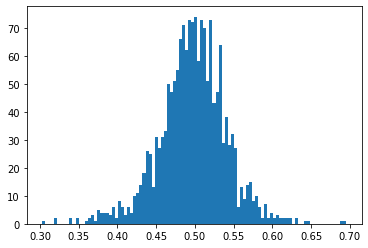

In [ ]:
plt.hist(liste_mdn_train,bins=100)

In [ ]:
def get_best_distribution(data):
    #dist_names = ["norm", "t","exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

Médiane

In [ ]:
get_best_distribution(liste_mdn_train)

Best fitting distribution: johnsonsu
Best p value: 0.9969100086250848
Parameters for the best fit: (0.22473590056553872, 1.735411646026376, 0.5067116057463403, 0.06309391538339168)


('johnsonsu',
 0.9969100086250848,
 (0.22473590056553872,
  1.735411646026376,
  0.5067116057463403,
  0.06309391538339168))

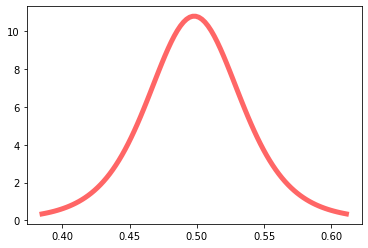

In [ ]:
# Students
fig, ax = plt.subplots(1, 1)
df = 5.68148036712962
loc = 0.4980292881288575
scale = 0.03535632277053981

x = np.linspace(t.ppf(0.01, df=df,loc=loc,scale=scale),t.ppf(0.99, df=df,loc=loc,scale=scale), 100)
ax.plot(x, t.pdf(x, df=df,loc=loc,scale=scale),'r-', lw=5, alpha=0.6, label='t pdf')

In [ ]:
score_pdf_med = t.pdf(mdn_test, df=df,loc=loc,scale=scale)*100

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest2_mdi341_Fayyaz_med_stud.csv', score_pdf_med, fmt = '%1.15f', delimiter=',')
#score: 0.32

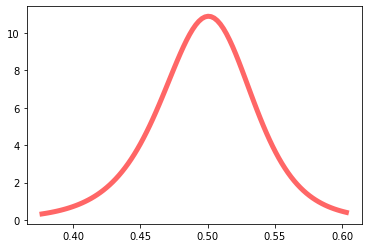

In [ ]:
#johnsonsu
a = 0.22473590056553872
b = 1.735411646026376,
loc = 0.5067116057463403,
scale = 0.06309391538339168

fig, ax = plt.subplots(1, 1)

x = np.linspace(johnsonsu.ppf(0.01, a,b,loc,scale),johnsonsu.ppf(0.99, a, b,loc,scale), 100)
ax.plot(x, johnsonsu.pdf(x, a, b,loc,scale),'r-', lw=5, alpha=0.6, label='johnsonsu pdf')

In [ ]:
score_pdf_med = johnsonsu.pdf(mdn_test, a, b,loc,scale)*100

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest3_mdi341_Fayyaz_med_john.csv', score_pdf_med, fmt = '%1.15f', delimiter=',')
#score: 0.39

Ecart-Type

(array([ 1.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  4.,  3.,  2.,  1.,  4.,
         3.,  6.,  3.,  3.,  6.,  9.,  5.,  5., 12., 13., 15., 15., 23.,
        25., 33., 30., 35., 32., 48., 49., 65., 57., 65., 87., 68., 89.,
        66., 83., 72., 66., 42., 54., 42., 35., 32., 33., 34., 23., 28.,
        34., 34., 22., 20., 21., 17., 10., 11., 12.,  9.,  5.,  9.,  4.,
         3.,  4.,  5.,  0.,  3.,  4.,  1.,  1.,  1.,  3.,  2.,  2.,  0.,
         1.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02431927, 0.02690953, 0.0294998 , 0.03209007, 0.03468033,
        0.0372706 , 0.03986086, 0.04245113, 0.0450414 , 0.04763166,
        0.05022193, 0.0528122 , 0.05540246, 0.05799273, 0.06058299,
        0.06317326, 0.06576353, 0.06835379, 0.07094406, 0.07353433,
        0.07612459, 0.07871486, 0.08130513, 0.08389539, 0.08648566,
        0.08907592, 0.09166619, 0.09425646, 0.09684672, 0.09943699,
        0.10202726, 0.1046

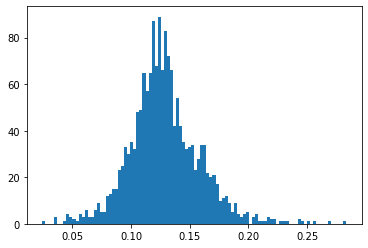

In [ ]:
plt.hist(std_train,bins=100)

In [ ]:
get_best_distribution(std_train)

Best fitting distribution: alpha
Best p value: 0.0
Parameters for the best fit: (20.961492789571864, -0.4865855419864447, 12.862646887967454)


('alpha', 0.0, (20.961492789571864, -0.4865855419864447, 12.862646887967454))

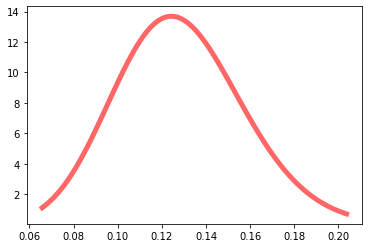

In [ ]:
fig, ax = plt.subplots(1, 1)

a_std = 20.961492789571864
loc_std = -0.4865855419864447
scale_std = 12.862646887967454

x = np.linspace(alpha.ppf(0.01, a=a_std,loc=loc_std,scale=scale_std),alpha.ppf(0.99, a=a_std,loc=loc_std,scale=scale_std), 100)
ax.plot(x, alpha.pdf(x, a=a_std,loc=loc_std,scale=scale_std),'r-', lw=5, alpha=0.6, label='alpha pdf')

In [ ]:
score_pdf_std = alpha.pdf(std_test,a=a_std,loc=loc_std,scale=scale_std)*100

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest4_mdi341_Fayyaz_std_alpha.csv', score_pdf_std, fmt = '%1.15f', delimiter=',')
#score: 0.48

## Multiple Dimensions

Tout d'abord, nous allons explorer différentes familles d'algorithmes, afin de créer pour chacune le meilleure scoreur. Le code d'Albert Thomas propose un réglage d'hyperparamètres en non-supervisé pour certains algorithmes, pour les autres la recherche d'hyperparamètre s'est faite en testant directement par soumission du score.  
Puis nous allons essayer de combiner les différents scoreurs obtenus afin d'améliorer le score final.

### **Unique Scoreur**

#### Code Albert Thomas

Recherche d'hyperparamètres dans le cadre non supervisé pour les algorithmes AverageKLPE, MaxKLPE, OCSVM, KernelSmoothing, IsolationForest.  
Code trouvable sur le github albertcthomas/anomaly_tuning

In [ ]:
!pip install git+https://github.com/albertcthomas/anomaly_tuning/

  Cloning https://github.com/albertcthomas/anomaly_tuning/ to /tmp/pip-req-build-4ts0j20a
  Running command git clone -q https://github.com/albertcthomas/anomaly_tuning/ /tmp/pip-req-build-4ts0j20a
  Created wheel for anomaly-tuning: filename=anomaly_tuning-0.1.dev0-cp36-none-any.whl size=9197 sha256=1ce5b064518476a854f3e6296b0150fff89f06405eacca5299c22c6709182f6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-grlstoqj/wheels/25/a8/dd/c504341e8c2e3cfab186280a6aaf90f69afba0048071e0f440
Successfully built anomaly-tuning


In [ ]:
from sklearn.model_selection import ShuffleSplit

from anomaly_tuning.estimators import (AverageKLPE, MaxKLPE, OCSVM,
                                       KernelSmoothing, IsolationForest)

from anomaly_tuning import anomaly_tuning
from anomaly_tuning.utils import GaussianMixture  # simple class to sample from a multivariate Gaussian mixture

In [ ]:
X = X_all_train
Y = X_all_test

n_samples = xtrain.shape[0]
N_JOBS = -1

In [ ]:
X.shape

(1677, 177)

In [ ]:
algorithms = [AverageKLPE, MaxKLPE, OCSVM, IsolationForest, KernelSmoothing]
algo_param = {
    'AverageKLPE': {'k': np.arange(1, min(50, int(0.8 * n_samples)), 2),
                    'novelty': [True]},
    'MaxKLPE': {'k': np.arange(1, min(50, int(0.8 * n_samples)), 2),
                'novelty': [True]},
    'OCSVM': {'sigma': np.linspace(0.01, 5., 10)},
    'IsolationForest': {'max_samples': np.linspace(0.1, 1., 10)},
    'KernelSmoothing': {'bandwidth': np.linspace(0.01, 5., 10)},
}

In [ ]:
# Tuning step
n_estimators = 10
cv = ShuffleSplit(n_splits=n_estimators, test_size=0.2, random_state=42)

score_agg = np.zeros([xtest.shape[0]])

for algo in algorithms:

    name_algo = algo.__name__
    print('--------------', name_algo, ' -------------')
    parameters = algo_param[name_algo]

    models, _ = anomaly_tuning(X, base_estimator=algo,
                               parameters=parameters,
                               random_state=42,
                               cv=cv, n_jobs=N_JOBS)

    score = np.zeros([xtest.shape[0]])
    print(score.shape)
    for n_est in range(n_estimators):
        clf = models[n_est]
        res = np.array(clf.score_samples(Y))
        #print(res.shape)
        score = res + score
        #print(score.shape)
    score = -score/n_estimators

    score_agg = score_agg+score
    nom_fichier = 'albert_thomas' + name_algo
    np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest_'+nom_fichier, score, fmt = '%1.15f', delimiter=',')

np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest_agg', score_agg, fmt = '%1.15f', delimiter=',')

-------------- AverageKLPE  -------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  3.5min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.6min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.9min finished


(2511,)
-------------- MaxKLPE  -------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  3.5min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.9min finished


(2511,)
-------------- OCSVM  -------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.7min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.7min remaining:   44.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished


(2511,)
-------------- IsolationForest  -------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   56.1s remaining:   56.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   57.0s remaining:   24.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


(2511,)
-------------- KernelSmoothing  -------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   31.2s remaining:   31.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   32.2s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   42.9s finished


(2511,)


In [ ]:
score.shape

(2511,)

DB-Outlier

#### LOF

Local Outlier Factor: L'idée est de comparer la densité de chaque élément par rapport à la densité de ses voisins les plus proches. Si un élément a une densité plus faibles que ses voisins, on lui attribue un score élevé pour signaler une anomalie.  

https://en.wikipedia.org/wiki/Local_outlier_factor

In [ ]:
X_train_LOF = np.c_[array_arima,std_train,array_rainflow,mdn_train,kur_train,skw_train,min_train,max_train]
X_test_LOF = np.c_[array_arima_test,std_test,array_rainflow_test,mdn_test,kur_test,skw_test,min_test,max_test]

In [ ]:
## LOF
lof_PCA = LocalOutlierFactor(n_neighbors = 40 ,contamination = 'auto', novelty = True)
lof_PCA.fit(X_train_LOF)
# Calculate anomaly score on the (PCA-transformed) test data
sscore = -lof_PCA.score_samples(X_test_LOF)
print(sscore[:100])

[ 2.01894983  1.48585704  1.08329462  1.39193078  1.24940678  1.49963397
  1.76336535  1.03886932  1.20158678  1.37173461  1.60229794  1.24878742
  1.08430384  2.45471129  1.1977754   1.20219772  1.1222287   1.49312056
  1.50319666  1.29164242  0.99265257  1.26777969  1.10693369  1.07666155
 17.56277673  1.22274988  1.21536274  1.21603403  1.30626154  1.75085402
  1.41832091  1.21880867  1.22289409  1.22808517  1.48676023  1.48053433
  1.30525468 13.96957467  1.04286572  1.40306376  1.01522964  1.06777021
  1.06620949  1.44592113  1.41063494  1.84321458  1.0390998   1.00940471
  1.34533851  1.15946492  1.563455    0.99174488  1.37930976  1.77928909
  0.99382465  1.47490859  1.22414825  2.10135776  1.0066236   1.3323749
  2.05310788  1.0139209   1.0734298   1.24018392  1.41614054  1.31771457
  4.27416727  1.34507746  1.14429644  1.06039044 25.9566481   1.00496943
  1.6016124   1.00261574  1.97061311  1.16771147  1.90756187  1.34482459
  1.47343746  1.37415139  1.30110546  1.85809966  1.

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest77_mdi341_Fayyaz_lof_minmax.csv', sscore, fmt = '%1.15f', delimiter=',')
#score: 0.53
#score: 0.537
#score: 0.68 (PCA + sk)
#score: 0.72 (PCA30 + sk)
#score: 0.815

#### LoOP

Local Outlier Probabilities. Similaire au LOF mais fourni en sortie une probabilité d'être anomalique.  

https://github.com/vc1492a/PyNomaly

In [ ]:
X_train_Loop =  np.c_[array_arima,std_train,array_rainflow,mdn_train,kur_train,skw_train,min_train,max_train]
X_test_Loop = np.c_[array_arima_test,std_test,array_rainflow_test,mdn_test,kur_test,skw_test,min_test,max_test]

In [ ]:
!pip install PyNomaly

In [ ]:
import PyNomaly
from PyNomaly import loop

In [ ]:
m_train = loop.LocalOutlierProbability(X_train_Loop,n_neighbors=50).fit()
m_train.local_outlier_probabilities

array([0.8918268445010508, 0.26050392441814313, 0.18875129230620274, ...,
       0.2638704508261736, 0.4765496239298001, 0.5516789887533405],
      dtype=object)

In [ ]:
test_scores = []
for row in range(xtest.shape[0]):
    test_scores.append(m_train.stream(X_test_Loop[row,:]))

test_scores = np.array(test_scores)

In [ ]:
score_loop = test_scores

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest12_mdi341_Fayyaz_LoOP_StatsReg.csv', test_scores, fmt = '%1.15f', delimiter=',')
#score: 0.556 (X_arima_std, k=10)
#score: 0.716 (X_rf,k=7) 
#score:  0.779 (X_rf,k=10)
#score:  0.783 (X_rf,k=15)
#score:  0.785 (X_rf,k=20)
#score:  0.785 (X_rfmd,k=20)
#score 0.804 (X_sk, k=10)
#score 0.815 (X_sk, k=20)
#score 0.818 (X_sk, k=25)
#score 0.820 (X_sk, k=30)
#score 0.822 (X_sk, k=35)
#score 0.823 (X_sk, k=40)
#score 0.824 (X_sk, k=45)
#score 0.825 (X_sk, k=50)
#score 0.825 (X_sk, k=50)
#score 0.823 (X_sk, k=55)
#score 0.825 (X_minmax, k=50)
#score 0.825 (X_minmax, k=100)

#### OSVM

En se basant sur des vecteurs de support, l'idée est de trouver la frontière la plus éloignée de l'origine possible.

https://www.researchgate.net/figure/OSVM-with-a-2-dimensional-classification-problem-in-which-we-distinguish-four-classes-of_fig2_300358423  

https://www.youtube.com/watch?v=rNGtj2iEw6g

In [ ]:
X_train_osvm = X_train_stats
X_test_osvm = X_test_stats

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
clf_osvm = OneClassSVM(nu=0.001, gamma=0.5).fit(X_train_osvm)
score_osvm = -clf_osvm.score_samples(X_test_osvm)

In [ ]:
print(len(score_osvm))
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest69_mdi341_Fayyaz_osvm_stats.csv', score_osvm, fmt = '%1.15f', delimiter=',')
#score: 0.69 (X_strf) nu = 0.001, gamma: 0.1
#score: 0.73 (X_stats) nu = 0.001, gamma: 0.1
#score: 0.735 (X_stats) nu = 0.001, gamma: 0.5
#score: 0.769 (X_stats) nu = 0.001, gamma: 0.5

2511


Considérons qu'il n'y a pas d'outlier dans l'échantillon train, en fixant nu = 1/n, nous allons faire une Cross-Validation pour sélectionner le meilleur paramètre gamma. Que mettre en scoring? Scoring perso? Voir code Albert Thomas

In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer


parameters = {'gamma':[1, 10]}
clf_osvm = OneClassSVM(nu=0.01).fit(X_train)
clf = GridSearchCV(clf_osvm, param_grid=parameters,cv=5,scoring='accuracy')
clf.fit(X_train)

TypeError: ignored

#### Isolation Forest

https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45


In [ ]:
X_train_isoforest = np.c_[X_stats_train,array_fft]
X_test_isoforest = np.c_[X_stats_test,array_fft_test]

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
rng = np.random.RandomState(42)

clf = IsolationForest(max_samples=100, n_estimators=10000, random_state=rng, max_features=0.8)
clf.fit(X_train_isoforest)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=0.8, max_samples=100, n_estimators=10000,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7FCF61B74CA8, verbose=0,
                warm_start=False)

In [ ]:
scores_IsoForest = -clf.score_samples(X_test_isoforest)

In [ ]:
scores_IsoForest[liste_constant]#2506#225

array([0.37270124, 0.37301103, 0.37270124, 0.37270124, 0.37270124,
       0.37301103, 0.37301103, 0.37270124, 0.37270124, 0.37270124,
       0.37270124, 0.37301103, 0.37270124, 0.37270124, 0.37301103,
       0.37270124, 0.37270124, 0.37270124, 0.37301103, 0.37270124,
       0.37301103, 0.37270124, 0.37270124, 0.37301103, 0.37301103,
       0.37301103, 0.37270124])

In [ ]:
scores_IsoForest[2506]

0.3878341371768431

In [ ]:
scores_IsoForest[-1]

0.5450425688181705

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest92_mdi341_Fayyaz_IF_xif.csv', scores_IsoForest, fmt = '%1.15f', delimiter=',')
# 0.54

**Ensemble**

#### HBOS

https://www.researchgate.net/publication/231614824_Histogram-based_Outlier_Score_HBOS_A_fast_Unsupervised_Anomaly_Detection_Algorithm

In [ ]:
X_train_HBOS = np.c_[fft_fpca,array_rainflow,X_train_stats,array_arima]
X_test_HBOS = np.c_[fft_fpca_test,array_rainflow_test,X_test_stats,array_arima_test]

In [ ]:
import pyod.models.hbos as hb

In [ ]:
clf_hbos = hb.HBOS(n_bins=20, alpha=0.1, tol=0.5, contamination=0.001).fit(X_train_HBOS)

In [ ]:
score_hbos = np.max(clf_hbos.predict_proba(X_test_HBOS),axis=1)

In [ ]:
score_hbos[ano_val]

array([0.89292296, 0.89186184, 0.87286   , 1.        , 0.92560033,
       0.94155003, 1.        , 0.94926471, 1.        , 0.92560033,
       0.89672211, 0.90470006, 1.        , 0.89996382, 1.        ,
       0.94926511, 1.        , 1.        , 1.        , 0.89292256,
       0.92559933, 0.94926412, 0.89186284, 0.89292356, 0.94926511,
       0.89186084, 0.91752455, 0.94926312, 1.        , 1.        ,
       0.89292157, 1.        , 1.        , 0.89186184, 1.        ,
       1.        , 1.        , 1.        , 0.91752315, 1.        ,
       0.96055187, 0.94926312, 1.        , 0.89757718, 1.        ,
       1.        , 1.        , 1.        , 0.82683393, 0.89186184,
       0.89186184, 0.89292256, 1.        , 0.96055227, 0.89186244,
       1.        , 1.        , 0.89186244, 0.89186124, 0.91752654,
       0.87286   , 1.        , 0.89186184, 0.89292157, 0.89186084,
       0.87771927, 0.79342872, 0.75429229, 0.73106222, 0.76165924,
       0.75429229, 0.78512771, 0.75429229, 0.79342238, 0.79347

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest101_mdi341_Fayyaz_hbos.csv', score_hbos, fmt = '%1.15f', delimiter=',')
#0.41
#0.44

#### ABOD (Trop long)

L'idée est qu'un outlier a des angles avec les autres éléments en moyenne différentes qu'un inlier 'entouré' d'autres inliers.
C'est un algorithme chronophage, donc pas utilisé dans notre étude.  

https://imada.sdu.dk/~zimek/publications/KDD2008/KDD08-ABOD.pdf


In [ ]:
import pyod.models.abod as ab

In [ ]:
clf_abod = ab.ABOD(contamination=0.001, n_neighbors=50, method='fast').fit(X_LOOP_PCA)

In [ ]:
score_abod = clf_abod.decision_function(X_LOOP_PCA_TEST)

In [ ]:
np.max(score_abod)

-3.685459705193405e-11

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest105_mdi341_Fayyaz_abod.csv', score_abod, fmt = '%1.15f', delimiter=',')
# 0.51

**Ensemble Outlier Detection**

#### COF

Connectivity-based Outlier Factor

In [ ]:
X_train_COF = X_stats_train
X_test_COF = X_stats_test

In [ ]:
import pyod.models.cof as co

In [ ]:
clf_cof = co.COF(contamination=0.1, n_neighbors=100).fit(X_train_strf)

In [ ]:
score_cof = np.max(clf_cof.predict_proba(X_test_strf),axis=1)

In [ ]:
score_cof[ano_val]

array([0.94600944, 1.        , 1.        , 0.54889229, 1.        ,
       1.        , 0.8380812 , 0.65667628, 0.83289759, 1.        ,
       0.79117365, 0.84766939, 0.70300117, 0.94466834, 0.74414248,
       1.        , 0.76046918, 0.6126381 , 0.6875101 , 1.        ,
       1.        , 1.        , 0.91572387, 1.        , 0.83672599,
       0.84938762, 0.94336816, 0.58511013, 0.5831817 , 0.79141687,
       1.        , 0.72011787, 0.61484396, 1.        , 0.89765824,
       0.80214855, 0.77139411, 0.60152625, 1.        , 0.78502151,
       1.        , 0.58493016, 0.70348313, 1.        , 0.84532496,
       0.8458951 , 0.76994493, 0.88546974, 0.66604317, 1.        ,
       1.        , 1.        , 0.81721891, 0.94179729, 1.        ,
       0.7447078 , 0.73057478, 1.        , 0.55099731, 0.58275877,
       1.        , 0.63321998, 1.        , 0.5832388 , 0.95453542,
       1.        , 0.99742462, 1.        , 1.        , 0.75708188,
       1.        , 0.98905364, 1.        , 0.79539229, 0.80943

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest106_mdi341_Fayyaz_cof.csv', score_cof, fmt = '%1.15f', delimiter=',')
#0.508
#0.49
#0.54

### **Ensemble**

Combinaison de différents Scoreurs pour améliorer les scores grâce à la diversité des règles de décisions

#### Feature Bagging

L'idée est d'induire de la diversité dans les sous-espaces de détection d'un algorithme. Nous créons donc plusieurs règles de scores, que nous pouvons ensuite moyenner, ou ne sélectionner que les scores les plus élevés transversalement à tous les scoreurs.

https://www.researchgate.net/publication/221653185_Feature_bagging_for_outlier_detection

In [ ]:
!pip install pyod

     |████████████████████████████████| 102kB 3.0MB/s 
     |████████████████████████████████| 2.1MB 9.8MB/s 
  Created wheel for pyod: filename=pyod-0.7.8.2-cp36-none-any.whl size=104997 sha256=810176568785e0d8293623fca13d0708ca859ccf8d2d4026bce715761da2aa19
  Stored in directory: /root/.cache/pip/wheels/28/38/ec/0ecbcd67faeb595ac0dbd9b5f85d5c5bdcb4573819e65240fe
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=65ba912c8b679a3e25bc144787802a8d6f6f821c5305c91867e9b21f3baa6d27
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=1671b6c35738959288c01b6a663b65c105625f88a3356f4f40ac0c6e0ee6710b
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [ ]:
from pyod.models.feature_bagging import FeatureBagging

In [ ]:
feat_bag = FeatureBagging(contamination=0.01,n_jobs=-1,combination='average',n_estimators=1000)

In [ ]:
feat_bag.fit(X_all_train)

FeatureBagging(base_estimator=None, bootstrap_features=False,
        check_detector=True, check_estimator=False, combination='average',
        contamination=0.01, estimator_params={}, max_features=1.0,
        n_estimators=1000, n_jobs=-1, random_state=None, verbose=0)

In [ ]:
feat_bag.decision_scores_

array([1.97926318, 1.29528003, 1.1641379 , ..., 1.2765138 , 1.40842275,
       1.47014167])

In [ ]:
score_feat_bag = feat_bag.decision_function(X_all_test)

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest14_mdi341_Fayyaz_FeatBag.csv', score_feat_bag, fmt = '%1.15f', delimiter=',')
# 0.70

#### Bagging

La difficulté de l'ensemble learning dans le cadre de la détection d'anomalie est la non uniformité d'output des différents algorithmes (Densité Locale, Probabilité, Distance ...). La littérature propose des unifications des scores:

Celle qui a été utilisée et qui a permis d'améliorer le score dans notre cas est l'uniformisation par la normalisation MinMax. On aurait pu tester le fit d'une loi statistique à chaque score, et un choix des éléments de l'ensemble learning par corrélation de Pearson, ou encore le raisonnement par le ranking et non pas par les scores (breadth-first).

https://www.dbs.ifi.lmu.de/~zimek/publications/SDM2011/SDM11-outlier-preprint.pdf

https://www.dbs.ifi.lmu.de/~zimek/publications/SDM2012/SDM12-outlierevaluation.pdf

https://www.kdd.org/exploration_files/V15-01-02-Zimek.pdf

Normalisation

In [ ]:
score_osvm_norm = (score_osvm - np.min(score_osvm))/(np.max(score_osvm)-np.min(score_osvm))
score_osvm_norm

array([0.92887922, 0.18322324, 0.02712682, ..., 0.13554072, 0.19268857,
       0.26827062])

In [ ]:
score_osvm_PCA_norm = (score_osvm_PCA - np.min(score_osvm_PCA))/(np.max(score_osvm_PCA)-np.min(score_osvm_PCA))
score_osvm_PCA_norm

array([0.46955675, 0.55343997, 0.15204749, ..., 0.21979288, 0.55975558,
       0.30905177])

In [ ]:
score_loop

array([0.79874848, 0.28299707, 0.        , ..., 0.38268793, 0.11052621,
       1.        ])

In [ ]:
score_IsoForest_norm = (scores_IsoForest-np.min(scores_IsoForest))/(np.max(scores_IsoForest)-np.min(scores_IsoForest))
score_IsoForest_norm[2506]#2506#225#liste_constant

0.88144836920175

In [ ]:
score_LOF = (sscore-np.min(sscore))/(np.max(sscore)-np.min(sscore))

**Cumulatise Sum**

In [ ]:
Score_Bagging = score_osvm_norm+score_loop+score_LOF#score_IsoForest_norm

In [ ]:
Score_Bagging[liste_constant] 

array([2.39845486, 2.67144373, 2.39845486, 2.39845486, 2.39845486,
       2.67144373, 2.67144373, 2.39845486, 2.39845486, 2.39845486,
       2.39845486, 2.67144373, 2.39845486, 2.39845486, 2.67144373,
       2.39845486, 2.39845486, 2.39845486, 2.67144373, 2.39845486,
       2.67144373, 2.39845486, 2.39845486, 2.67144373, 2.67144373,
       2.67144373, 2.39845486])

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest118_mdi341_Fayyaz_Bag.csv', Score_Bagging, fmt = '%1.15f', delimiter=',')
#score 0.832
#score 0.8326


#### Stacking in Isolation Forest

L'idée est de rentrer les scores issus des différents algorithmes comme constituant un nouvel espace, dans lequel on utiliserait l'Isolation Forest pour recréer un score d'anomalie. Pas eu de bons résultats

In [ ]:
X_train_stacking = np.c_[-lof_PCA.score_samples(X_train_LOF),m_train.local_outlier_probabilities,
                         -clf_osvm.score_samples(X_train_osvm), clf.score_samples(X_train_isoforest)]

In [ ]:
X_test_stacking = np.c_[score_LOF,score_loop,
                         score_osvm,score_IsoForest_norm]

In [ ]:
rng = np.random.RandomState(42)

clf_stack = IsolationForest(max_samples=100, n_estimators=10000, random_state=rng, max_features=1)
clf_stack.fit(X_train_stacking)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1, max_samples=100, n_estimators=10000,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7FEB76D4F258, verbose=0,
                warm_start=False)

In [ ]:
scores_IsoForest_stack = clf.score_samples(X_test_isoforest)

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest83_mdi341_Fayyaz_Stack.csv', scores_IsoForest_stack, fmt = '%1.15f', delimiter=',')
#0.41

#### Pyod Combination: AOM

Average Of Maximum:  divide base detectors into subgroups and take the maximum score for each subgroup. The final score is the average of all subgroup scores

In [ ]:
!pip install pyod

     |████████████████████████████████| 102kB 2.7MB/s 
     |████████████████████████████████| 2.1MB 8.5MB/s 
  Created wheel for pyod: filename=pyod-0.7.8.2-cp36-none-any.whl size=104997 sha256=a7ab97640ad921f6cfcd728879384903599fde30a4d279c95a4c517716d04b9e
  Stored in directory: /root/.cache/pip/wheels/28/38/ec/0ecbcd67faeb595ac0dbd9b5f85d5c5bdcb4573819e65240fe
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=2d3f52b5a116d09af48a24dc5477b54db1a3841760b73ebb99c7e374600ba090
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=89b6406f3055e771d398cf3ac2a58ed3e9c02aecc118c48bce49d9b26394a96e
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [ ]:
import pyod.models.combination as comb

ModuleNotFoundError: ignored

In [ ]:
X_comb = np.c_[score_osvm_norm,score_loop,score_LOF,score_cof,score_IsoForest_norm,score_osvm_PCA_norm,scores_IsoForest,score_loop,Score_Bagging/3]

In [ ]:
score_comb = comb.aom(X_comb,n_buckets=5,method='dynamic',bootstrap_estimators=0)
score_comb

array([0.90261209, 0.63548637, 0.54891145, ..., 0.59687452, 0.63915444,
       0.69414821])

In [ ]:
np.where(score_comb == 1)

(array([1938, 1945, 1960, 1971, 1996, 1999, 2002, 2018, 2037, 2040, 2060,
        2064, 2071, 2107, 2109, 2116, 2124, 2125, 2156, 2160, 2164, 2175,
        2196, 2201, 2266, 2292, 2297, 2313, 2320, 2344, 2359, 2368, 2372,
        2379, 2421, 2423, 2444, 2453, 2459, 2464, 2470, 2507]),)

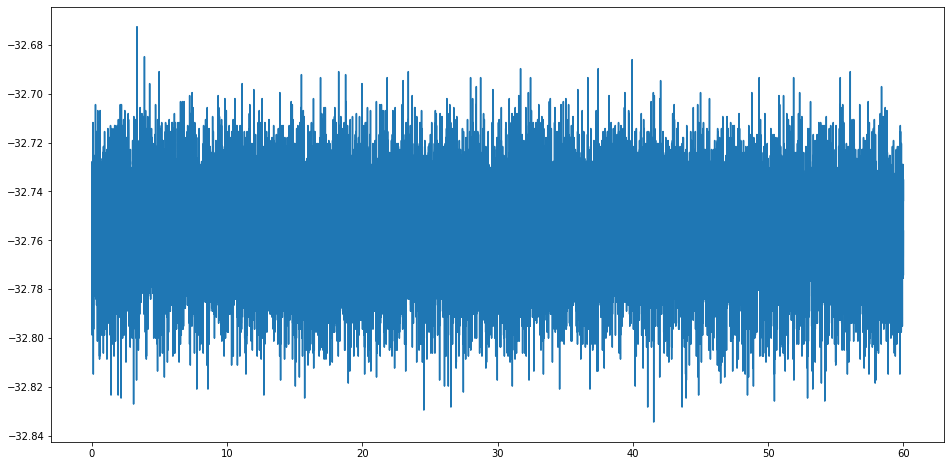

In [ ]:
indice_plot = 29
plt.figure(figsize=(16,8))
plt.plot(xt,xtest[np.where(score_comb == 1)[0][indice_plot],:])#2506

In [ ]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/MDI341/ytest116_mdi341_Fayyaz_comb.csv', score_comb, fmt = '%1.15f', delimiter=',')
#82.7
#81.4